<a href="https://colab.research.google.com/github/dkbiney-ml/learning_the_ml_ropes/blob/main/end_to_end_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import tarfile
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
HOUSING_PATH, DOWNLOAD_ROOT, HOUSING_URL


('datasets/housing',
 'https://raw.githubusercontent.com/ageron/handson-ml2/master/',
 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz')

In [5]:
import pandas as pd
def fetch_housing_data(housing_url= HOUSING_URL, housing_path = HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  with tarfile.open(tgz_path, 'r') as tar:
    tar.extractall(housing_path)

def load_housing(path= HOUSING_PATH):
  csv_path = os.path.join(HOUSING_PATH, 'housing.csv')
  return pd.read_csv(csv_path)

In [6]:
fetch_housing_data()
df = load_housing()

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df['ocean_proximity'].nunique()

5

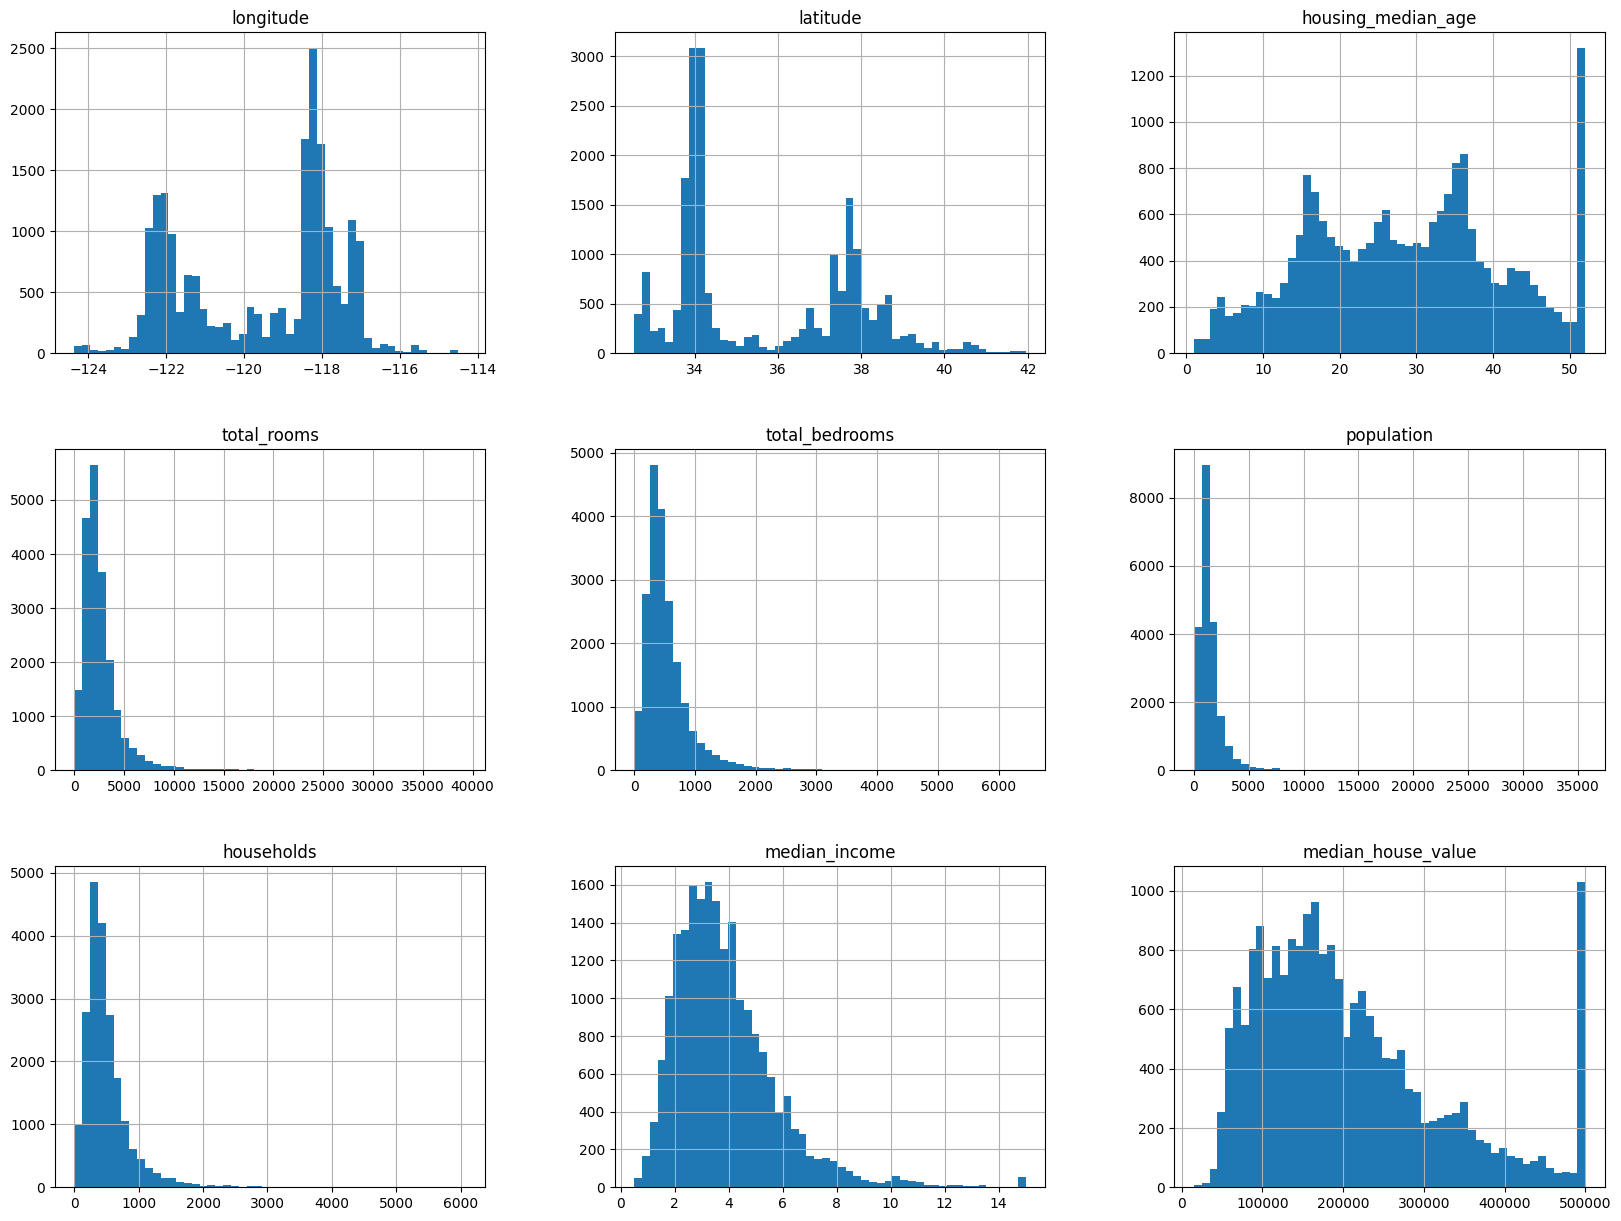

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize= (20, 15))
plt.show()

In [11]:
import numpy as np
# to avoid data snooping bias, split data now
def split_test_train(df = df, test_ratio = 0.2):
  shuffled_indices = np.random.permutation(len(df))
  test_size = int(len(shuffled_indices) * 0.2)
  test_indices = shuffled_indices[:test_size]
  train_indices = shuffled_indices[test_size:]
  return df.iloc[train_indices], df.iloc[test_indices]

In [12]:
train_df, test_df = split_test_train(df, 0.2)
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2962,-119.05,35.34,14.0,3580.0,984.0,1933.0,912.0,2.6637,175000.0,INLAND
8982,-118.43,34.00,37.0,1340.0,358.0,1008.0,340.0,3.7614,314300.0,<1H OCEAN
15004,-117.05,32.75,29.0,2767.0,612.0,1437.0,587.0,2.8306,142900.0,NEAR OCEAN
12611,-121.52,38.53,31.0,3089.0,585.0,1366.0,561.0,4.2885,160300.0,INLAND
9865,-121.83,36.61,27.0,5665.0,1281.0,3612.0,1191.0,3.0542,142100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
13015,-121.19,38.71,11.0,4415.0,NaN,1520.0,627.0,3.2321,390800.0,INLAND
2997,-119.03,35.32,12.0,2721.0,549.0,1294.0,523.0,2.5575,100200.0,INLAND
9537,-120.79,37.41,35.0,2436.0,466.0,1730.0,469.0,2.2071,85900.0,INLAND
2695,-115.37,32.81,23.0,1458.0,294.0,866.0,275.0,2.3594,74300.0,INLAND


In [13]:
from zlib import crc32
def is_test_set(identifier, test_ratio = 0.2):
  return crc32(np.int64(identifier) ) & 0xffffffff < test_ratio * 2 ** 32

def split_train_test_by_id(df, id_column):
  ids = df[id_column]
  test_ids = ids.apply(lambda id_ : is_test_set(id_))
  return df.loc[~test_ids], df.loc[test_ids]

df_with_id = df.reset_index()
df_with_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [14]:
df_with_id.columns
train_set , test_set = split_train_test_by_id(df_with_id, 'index')
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Axes: >

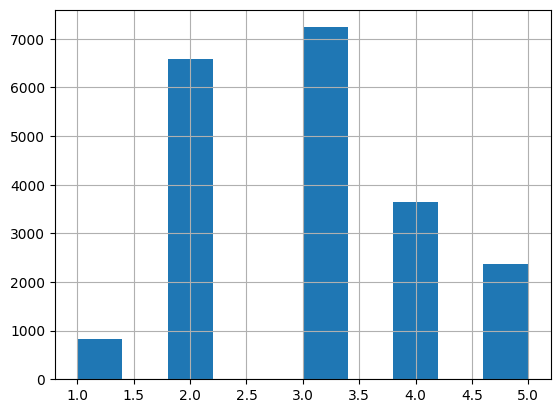

In [15]:
# Using stratified sampling
df['median_income_category'] = pd.cut(df['median_income'], bins=[0, 1.5 , 3, 4.5 , 6.0,  np.inf], labels = [1,2,3,4,5])
df['median_income_category'].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits= 1, test_size = 0.2, random_state = 42)
# split.split()
for train_ind, test_ind in split.split(df, df['median_income_category']):
  strat_train = df.loc[train_ind]
  strat_test = df.loc[test_ind]
  print(strat_train.shape, strat_test.shape)

strat_test['median_income_category'].value_counts() / len(strat_test)



(16512, 11) (4128, 11)


3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: median_income_category, dtype: float64

In [17]:
for set_ in (strat_train, strat_test):
  set_.drop("median_income_category", axis=1, inplace=True)
  print(set_.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 3965
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-

## Exploring

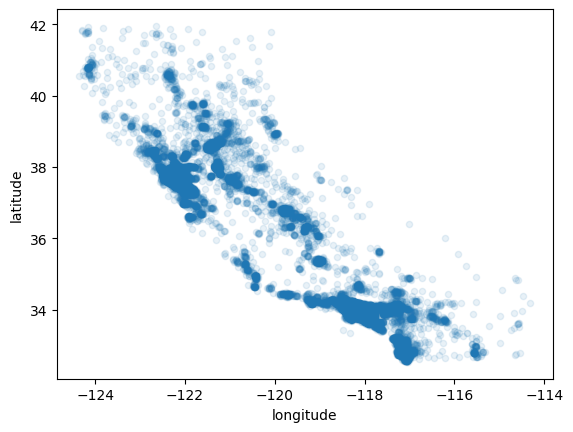

In [18]:
housing = strat_train.copy()
housing.plot(kind = "scatter", x= "longitude", y = "latitude", alpha= 0.1);

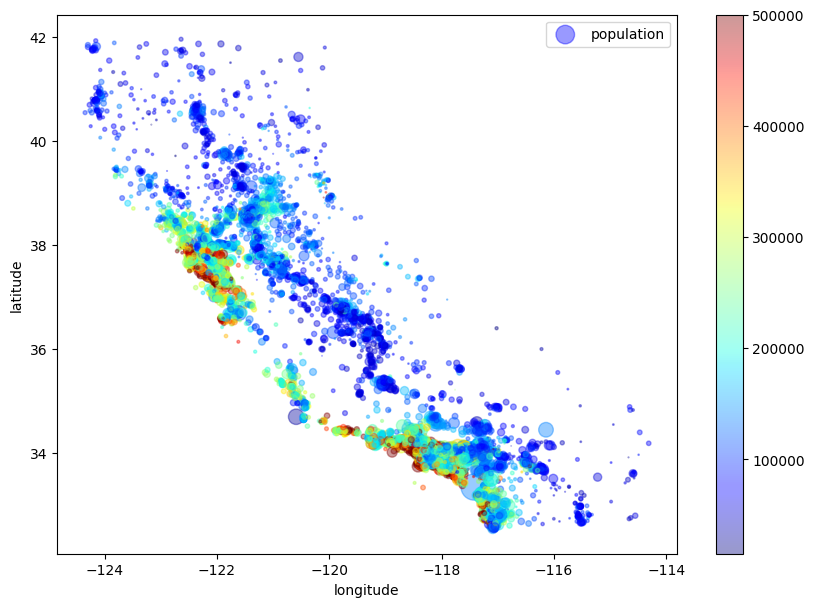

In [19]:
housing.plot(kind = "scatter", x= "longitude", y = "latitude", alpha= 0.4, s= housing['population'] / 100, label = 'population',  c = housing['median_house_value'], cmap = plt.get_cmap("jet"), figsize = (10, 7), colorbar = True )
plt.legend()

It will probably be useful to use a clustering algorithm to detect the main clusters, and
add new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

---



---



In [20]:
# Finding correlation
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


<ipython-input-20-9996b50803fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

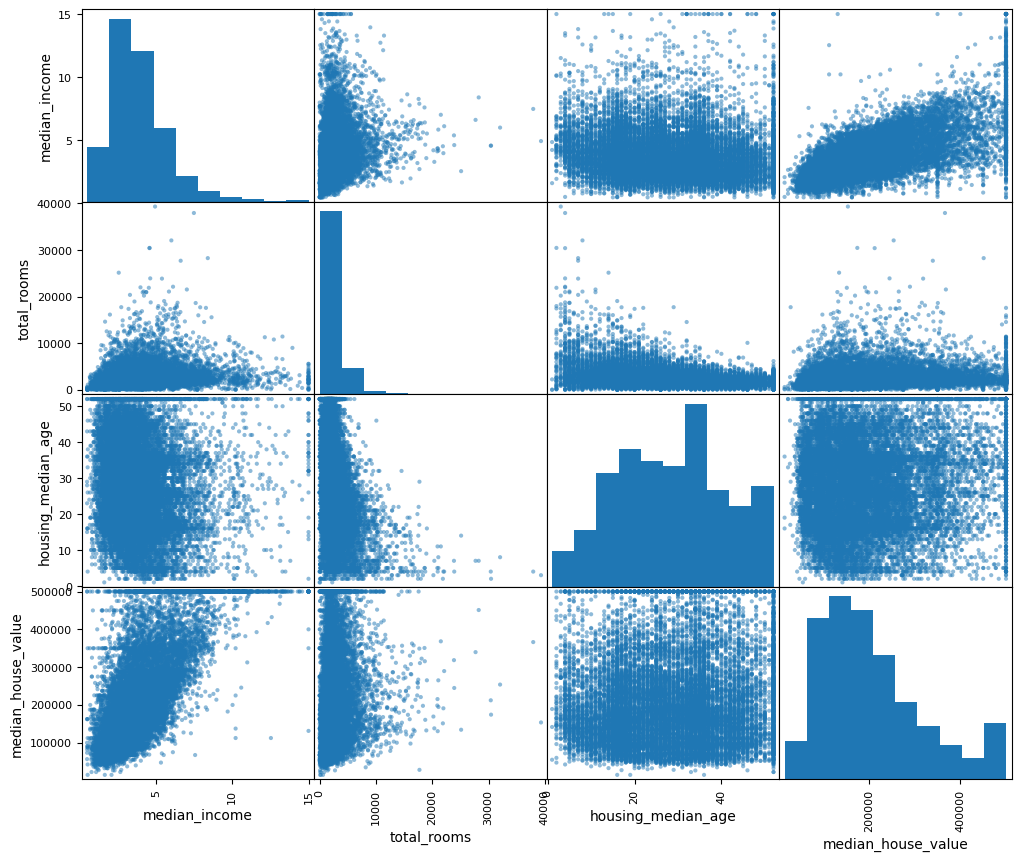

In [21]:
# plotting most promisingly correlated  attributes
attrs = ["median_income", "total_rooms", "housing_median_age", "median_house_value"]

# plot scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(housing[attrs], figsize= (12, 10));

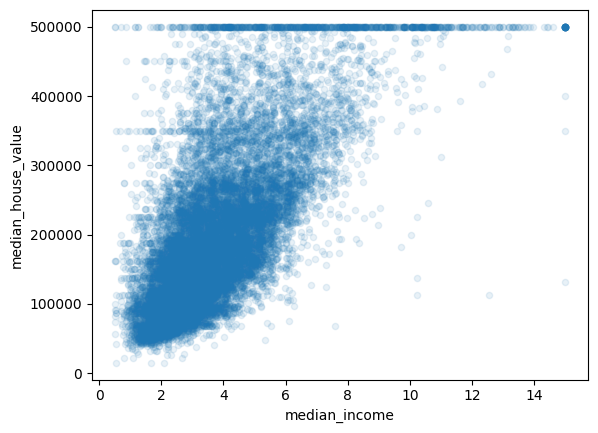

In [22]:
# Zoom into the strongest corr
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1);




---

First, the correlation is indeed very strong; you can
clearly see the upward trend and the points are not too dispersed.

---


 Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at $500,000.


---


 But this
plot reveals other less obvious straight lines: a horizontal line around $450,000,
another around 350,000,perhaps one around $280,000, and a few more below that.


---



---


You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.

## Experimenting with attribute combinations || Feature engineering

In [23]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending= False)

<ipython-input-23-f27381f2771a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Prepare data for machine learning algo

In [24]:
housing = strat_train.drop("median_house_value", axis=1)
housing_labels = strat_train["median_house_value"].copy()

In [25]:
#Let's clean
#imputing median for missing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
num_attr = housing.drop('ocean_proximity', axis=1)
imputer.fit(num_attr)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [26]:
X = imputer.transform(num_attr)
housing_tr = pd.DataFrame(X, columns = num_attr.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [27]:
# handling text and categories
housing_cat = housing[['ocean_proximity']]  #double square brackets create a df ??
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [28]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordered_cat = ordinal_encoder.fit_transform(housing_cat)
pd.Series(np.squeeze(ordered_cat), name = 'ordered_cat')
# check out the learned parameter, in this case categories
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
# ocean is not ordinal data so let's one-hot it
from sklearn.preprocessing import OneHotEncoder
uno_encoder = OneHotEncoder()
hot_encoded_cat = uno_encoder.fit_transform(housing_cat)
hot_encoded_cat

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Creating custom transformer

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room

  def fit(self, X, y = None):
    return self

  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] /  X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else: return np.c_[X, rooms_per_household, population_per_household]

attrs_adder = CombinedAttributesAdder(True)
hous_with_attr = attrs_adder.transform(housing.values)
hous_with_attr

array([[-121.46, 38.52, 29.0, ..., 5.485835694050992, 3.168555240793201,
        0.20578363026077975],
       [-117.23, 33.09, 7.0, ..., 6.927083333333333, 2.6236979166666665,
        0.16071428571428573],
       [-119.04, 35.37, 44.0, ..., 5.3933333333333335, 2.223333333333333,
        0.1915945611866502],
       ...,
       [-122.72, 38.44, 48.0, ..., 4.1104651162790695,
        2.6627906976744184, 0.2347949080622348],
       [-122.7, 38.31, 14.0, ..., 6.297405189620759, 2.411177644710579,
        0.1838351822503962],
       [-122.14, 39.97, 27.0, ..., 5.477157360406092, 3.1725888324873095,
        0.2057460611677479]], dtype=object)

In [31]:
#  Feature Scaling with standardization or normalization, may well depend on outliers
# let's pipeline the transformations

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Call each transformer classes with/without their hyperparameters
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attributer_adder', CombinedAttributesAdder(False)),
    ('scaler', StandardScaler())
])

housing_tr = num_pipeline.fit_transform(num_attr)
housing_tr

array([[-0.94135046,  1.34743822,  0.02756357, ..., -0.8936472 ,
         0.01739526,  0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  1.292168  ,
         0.56925554, -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.52543365,
        -0.01802432, -0.07537122],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.36547546,
        -0.5092404 , -0.03743619],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.16826095,
         0.32814891, -0.05915604],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.390569  ,
         0.01407228,  0.00657083]])

In [32]:
# Pipelining all attr types including categorical
from sklearn.compose import ColumnTransformer

cat_attrs = ['ocean_proximity']
num_attrs = num_attr.columns
full_pipeline = ColumnTransformer(
  [
      ('num', num_pipeline, num_attrs),
      ('cat', OneHotEncoder(), cat_attrs)
  ]
)

housing_prep = full_pipeline.fit_transform(housing)
housing_prep

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

## Training and evaluationg a model

In [33]:
from sklearn.linear_model import LinearRegression
# training a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(housing_prep, housing_labels)

housing_prep.shape


(16512, 15)

In [34]:
# let's try out some training data
np.random.seed = 42
st = np.random.randint(0, 100)
some_data = housing.iloc[:5]
their_labels = housing_labels.iloc[:5]

some_data_p = full_pipeline.transform(some_data)
predicted_vals = lin_reg.predict(some_data_p)
print(f"predicted", predicted_vals, "\n labels", their_labels.values)

predicted [ 88308.5135735  304174.12243205 154135.1578518  183826.73869117
 247307.37672157] 
 labels [ 72100. 279600.  82700. 112500. 238300.]


In [35]:
# let's measure performance

from sklearn.metrics import mean_squared_error

predicted_vals = lin_reg.predict(housing_prep)
lin_mse = mean_squared_error(list(housing_labels), predicted_vals)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68911.35422344579


### clearly underfitting model, implying model is too simple with respect to the noise generated and training data.
Possible solutions:


*   A more complex model
*   Better feature selection and engineering




In [36]:
# Let's try a decision regressional model

from sklearn.tree import DecisionTreeRegressor

# fitting
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prep, housing_labels)

# measure performance
predicted_vals = tree_reg.predict(housing_prep)
tree_mse = mean_squared_error(list(housing_labels), predicted_vals)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)


0.0


### Possible overfitting

In [37]:
from sklearn.model_selection import cross_val_score
# Negatives cause cross_val_score accepts a utiliy function not cost
scores = cross_val_score(tree_reg, housing_prep, housing_labels, scoring= 'neg_mean_squared_error', cv= 10)
tree_rmse_scores = np.sqrt(- scores )

In [38]:
def display_scores(scores):
  print('Scores : ', scores)
  print("Scores mean", np.mean(scores))
  print("Scores std ", np.std(scores))

display_scores(tree_rmse_scores)

Scores :  [70861.72973699 68680.70954675 68578.13719459 72799.83355919
 68431.56869001 75252.26636796 70355.54290005 71170.11461601
 69202.9110378  71141.73310807]
Scores mean 70647.45467574042
Scores std  2040.4081628716783


In [39]:
lin_scores = cross_val_score(lin_reg, housing_prep, housing_labels, scoring= "neg_mean_squared_error", cv = 10)
lin_rmse = np.sqrt(- lin_scores)
display_scores(lin_rmse)

Scores :  [72327.16076767 64517.26490514 68064.68293242 69115.0013636
 67146.11690224 73027.74105799 70586.20149172 69341.53755437
 66928.91520262 70506.05866694]
Scores mean 69156.06808447083
Scores std  2462.9099081209356


In [40]:
from sklearn.ensemble import RandomForestRegressor
rand_forest_reg = RandomForestRegressor()
rand_forest_reg.fit(housing_prep, housing_labels)
predicted_vals = rand_forest_reg.predict(housing_prep)
rfr_mse = np.sqrt(mean_squared_error(list(housing_labels), predicted_vals))
print(rfr_mse)

18735.393602514807


In [41]:
scores = cross_val_score(rand_forest_reg, housing_prep, housing_labels, scoring= 'neg_mean_squared_error', cv = 10)
rfr_rmse = np.sqrt(-scores)
display_scores(rfr_rmse)

Scores :  [51664.98113113 49244.62607516 46808.02912871 52081.42022342
 47284.25967606 51407.89403983 52355.06528098 49865.67786831
 48490.43338011 53756.97326772]
Scores mean 50295.93600714321
Scores std  2197.803095847515


you should try out many
other models from various categories of Machine Learning algorithms (several Support Vector Machines with different kernels, possibly a neural network, etc.), without
spending too much time tweaking the hyperparameters. The goal is to shortlist a few
(two to five) promising models.

## Fine tuning the model

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], "max_features": [ 2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prep, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
print("best params", grid_search.best_params_, "best estimators", grid_search.best_estimator_)
print("best score", np.sqrt(-grid_search.best_score_))

best params {'max_features': 6, 'n_estimators': 30} best estimators RandomForestRegressor(max_features=6, n_estimators=30)
best score 49663.31846780979


In [44]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.078753,0.005389,0.004799,0.000069,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.194154e+09,-4.095228e+09,...,-4.038006e+09,1.210678e+08,18,-1.154560e+09,-1.076510e+09,-1.136883e+09,-1.056531e+09,-1.059245e+09,-1.096746e+09,4.095498e+07
1,0.256737,0.007280,0.013361,0.000418,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.030349e+09,-2.853232e+09,...,-3.008276e+09,1.292880e+08,11,-5.834297e+08,-5.617578e+08,-5.959244e+08,-5.790471e+08,-5.601126e+08,-5.760543e+08,1.354033e+07
2,0.924555,0.190145,0.039940,0.003830,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.779151e+09,-2.556101e+09,...,-2.730729e+09,1.097130e+08,8,-4.356382e+08,-4.233319e+08,-4.321834e+08,-4.190579e+08,-4.268818e+08,-4.274186e+08,5.952392e+06
3,0.135270,0.021475,0.004790,0.000054,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.483831e+09,-3.482837e+09,...,-3.615644e+09,1.330095e+08,16,-9.327822e+08,-9.385443e+08,-9.472404e+08,-9.509753e+08,-9.991692e+08,-9.537423e+08,2.359595e+07
4,0.407892,0.003739,0.012738,0.000195,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.810911e+09,-2.629712e+09,...,-2.731717e+09,7.701899e+07,9,-5.028197e+08,-5.155909e+08,-5.260422e+08,-4.875860e+08,-4.982200e+08,-5.060518e+08,1.344158e+07
5,1.227555,0.011013,0.037647,0.002456,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.458299e+09,-2.342906e+09,...,-2.488340e+09,1.133862e+08,3,-3.842506e+08,-3.853657e+08,-3.851873e+08,-3.862248e+08,-3.768531e+08,-3.835763e+08,3.419577e+06
6,0.231646,0.030904,0.005698,0.000275,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.559385e+09,-3.577729e+09,...,-3.496491e+09,1.092125e+08,14,-8.995530e+08,-8.884835e+08,-9.063403e+08,-9.294259e+08,-8.602689e+08,-8.968143e+08,2.265716e+07
7,0.682192,0.140455,0.012968,0.000645,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.752242e+09,-2.557134e+09,...,-2.702226e+09,1.095529e+08,7,-5.259983e+08,-4.936389e+08,-5.084991e+08,-4.988692e+08,-5.039810e+08,-5.061973e+08,1.107884e+07
8,1.795448,0.196196,0.037137,0.002133,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.482271e+09,-2.365766e+09,...,-2.466445e+09,1.037049e+08,1,-3.813346e+08,-3.813558e+08,-3.780890e+08,-3.730937e+08,-3.710513e+08,-3.769849e+08,4.233051e+06
9,0.297074,0.046006,0.005475,0.000473,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.430649e+09,-3.323871e+09,...,-3.428355e+09,7.425245e+07,13,-9.038200e+08,-8.664433e+08,-8.989047e+08,-9.122909e+08,-9.013169e+08,-8.965552e+08,1.571822e+07


In [45]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rand_search = RandomizedSearchCV(rand_forest_reg, param_grid, n_iter = 25, scoring = 'neg_mean_squared_error', cv = 10  )

In [46]:
rand_search.fit(housing_prep, housing_labels)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=25,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_squared_error')

In [47]:
feature_importances = rand_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformer_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])

AttributeError: ignored

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

Hopefully this chapter gave you a good idea of what a Machine Learning project
looks like, and showed you some of the tools you can use to train a great system. As
you can see, much of the work is in the data preparation step, building monitoring
tools, setting up human evaluation pipelines, and automating regular model training.

Using this chapter’s housing dataset:
1. Try a Support Vector Machine regressor ( sklearn.svm.SVR ), with various hyper‐
parameters such as kernel="linear" (with various values for the C hyperpara‐
meter) or kernel="rbf" (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?
2. Try replacing GridSearchCV with RandomizedSearchCV .
3. Try adding a transformer in the preparation pipeline to select only the most
important attributes.
4. Try creating a single pipeline that does the full data preparation plus the final
prediction.
5. Automatically explore some preparation options using GridSearchCV .
Solutions to these exercises are available in the online Jupyter notebooks at https://
github.com/ageron/handson-ml2.
Try It Out!
